In [40]:
# Introduction The relationship between prior nights' sleep and gait, or the manner in which a person walks, is a subject of significant interest in sleep science and biomechanics. Sleep quality and duration have been recognized as influential factors in various aspects of human physiology and cognitive function. Understanding how sleep patterns influence gait can provide valuable insights into the intricate interplay between restorative rest and fundamental locomotion.

#This exploration delves into the potential correlations between the quality and duration of sleep a person obtains the night before, and their subsequent gait patterns. It seeks to shed light on how variations in sleep metrics may impact an individual's posture, step variability, and overall walking characteristics. By examining these associations, we aim to contribute to a more comprehensive understanding of the intricate relationship between sleep health and fundamental human movement.

In [38]:
#Import Libraries

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
#Load the dataset

# Read the Excel file
data = pd.read_excel(r"C:/Users/navin/OneDrive/Desktop/Python Projects/20210318_gait_data_1.xlsx")

In [13]:
data.head().style.set_properties(**{'background-color':'royalblue','color':'white','border-color':'#8b8c8c'})

,Subjectnumber,Age,Gender1male2female,Heightcm,WeightinKG,BMI,Hours_slept_prior_night,lessthan7_yes1_no2,morethan9_yes1_no2,7to9_yes1_no2,7to9_yes1_no2.1,PlusMinus1_typical_Yes1_No2,PlusMinus1_typical_Yes1_No2.1,Anticipatory_Postural_Adjustment_Durations,Anticipatory_Postural_Adjustment_First_Step_Durations,Anticipatory_Postural_Adjustment_First_Step_ROM,Anticipatory_Postural_Adjustment_Forward_Peak,Anticipatory_Postural_Adjustment_Lateral_Peak,Back_Right_Frontal_Bending_Max,Back_Left_Frontal_Bending_Max,Back_Frontal_Bending_ROM,Back_Sagittal_Max_Angle,Back_Sagittal_Min_Angle,Back_Sagittal_ROM,Back_Transverse_Right_Max_Angle,Back_Transverse_Left_Max_Angle,Back_Transverse_ROM,Neck_Right_Frontal_Bending_Max,Neck_Left_Frontal_Bending_Max,Neck_Frontal_Bending_ROM,Neck_Sagittal_Max_Angle,Neck_Sagittal_Min_Angle,Neck_Sagittal_ROM,Neck_Transverse_Right_Max_Angle,Neck_Transverse_Left_Max_Angle,Unnamed: 35,Neck_Transverse_ROM,Cadence,Cadence_variance,Double_leg_support,Double_leg_support_variance,Midswing_elevation,Midswing_elevation_variance,Gait_cycle_duration,Gait_cycle_duration_variance,Gait_speed,Gait_speed_variance,Step_variability,Step_variability_asymmetry,Circumduction,Circumduction_variance,Foot_strike_angle,Foot_strike_angle_variance,Toe_out_angle,Toe_out_angle_variance,Single_leg_support,Single_leg_support_variance,Stance,Stance_variance,Step_duration,Step_duration_variance,Stride_length,Stride_length_variance,Swing,Swing_variance,Terminal_double_leg_support,Terminal_double_leg_support_variance,Toe_out_angle.1,Toe_out_angle_variance.1,Lumbar_Frontal_ROM,Lumbar_Sagittal_ROM,Lumbar_Transverse_ROM,Trunk_Frontal_ROM,Trunk_Sagittal_ROM,Trunk_Transverse_ROM,Arm_swing_velocity,Arm_swing_velocity_variance,Arm_ROM,Arm_ROM_variance,Trunk_angle,Turns_duration,Number_turns,Turn_velocity,Turns_number_steps
0,24,20,2,167.640000,47.727273,16.945592,7.750000,2,2,1,True,nan,nan,0.340000,0.510000,20.060000,0.290000,0.950000,3.520000,5.260000,8.780000,6.020000,3.330000,2.700000,6.230000,0.780000,7.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,111.620000,0.062713,15.875000,0.850394,1.130000,2.654867,1.075000,0.465116,1.125000,1.333333,3.520000,4.607046,2.010000,24.875622,22.355000,11.563409,36.615000,3.564113,42.160000,0.806452,58.035000,0.353235,0.540000,0.000000,1.205000,1.244813,41.965000,0.488502,8.005000,3.310431,2.410000,108.713693,4.880000,4.170000,7.810000,4.430000,4.640000,4.960000,153.255000,1.275652,34.325000,8.201020,183.770000,2.130000,20.000000,174.820000,3.700000
1,324,20,1,175.260000,73.636364,23.920605,4.750000,1,2,2,False,nan,nan,0.340000,0.550000,33.360000,0.170000,0.650000,6.790000,0.620000,7.410000,2.730000,-1.610000,4.350000,3.820000,12.330000,16.160000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,107.885000,0.384669,18.995000,0.131614,1.700000,6.470588,1.115000,0.448430,1.100000,0.909091,2.670000,3.088803,2.725000,21.100917,24.215000,0.392319,34.670000,1.701759,40.360000,0.693756,59.355000,0.429618,0.560000,0.000000,1.225000,0.408163,40.645000,0.627383,9.545000,3.195390,14.940000,14.390897,5.780000,4.840000,9.340000,3.970000,3.530000,8.770000,175.725000,6.848769,41.195000,10.668770,186.450000,2.260000,18.000000,175.680000,3.560000
2,361,20,2,165.100000,83.181818,30.449467,2.400000,1,2,2,False,nan,nan,0.480000,0.490000,25.590000,0.310000,0.840000,5.790000,3.720000,9.520000,-5.220000,-14.700000,9.480000,12.090000,4.930000,17.020000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,128.015000,0.855369,14.530000,0.206469,1.990000,18.592965,0.940000,1.063830,1.515000,2.310231,4.680000,9.826590,3.970000,8.312343,27.465000,1.693064,36.485000,2.233795,42.360000,2.313503,56.890000,1.775356,0.475000,3.157895,1.410000,2.127660,43.110000,2.342844,7.460000,0.670241,-2.215000,9.706546,7.910000,12.160000,13.680000,4.370000,10.770000,6.970000,382.665000,20.395124,76.630000,30.418896,187.140000,1.860000,24.000000,222.750000,3.380000
3,801,20,2,170.180000,71.363636,24.586990,7.167000,2,2,1,True,nan,nan,0.520000,0.480000,49.000000,0.580000,0.530000,4.44

In [36]:
#Data preprocessing

data.shape

(126, 84)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 84 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Subjectnumber                                          126 non-null    int64  
 1   Age                                                    126 non-null    int64  
 2   Gender1male2female                                     126 non-null    int64  
 3   Heightcm                                               125 non-null    float64
 4   WeightinKG                                             125 non-null    float64
 5   BMI                                                    125 non-null    float64
 6   Hours_slept_prior_night                                126 non-null    float64
 7   lessthan7_yes1_no2                                     126 non-null    int64  
 8   morethan9_yes1_no2                                

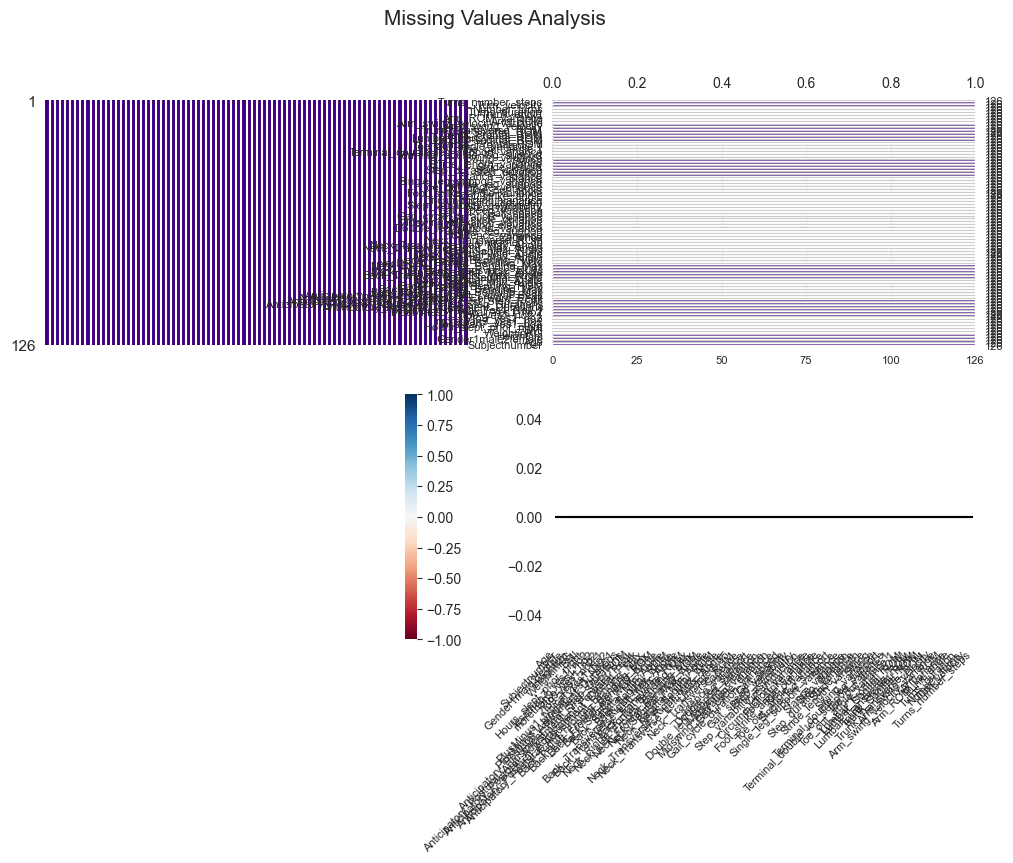

In [35]:
#Missing Values Analysis

import missingno as msno

fig, ax = plt.subplots(2,2,figsize=(12,7))
axs = np.ravel(ax)
msno.matrix(data,  fontsize=9, color=(0.25,0,0.5),ax=axs[0]);
msno.bar(data, fontsize=8, color=(0.25,0,0.5), ax=axs[1]);
msno.heatmap(data,fontsize=8,ax=axs[2]);
msno.dendrogram(data,fontsize=8,ax=axs[3], orientation='top')

fig.suptitle('Missing Values Analysis', y=1.01, fontsize=15)

# Save the plot
plt.savefig('missing_values_analysis.png')

# Show the plot
plt.show()

In [16]:
# handle missing values
data = data.fillna(0)  # Replace NaN with 0

In [17]:
data.columns

Index(['Subjectnumber', 'Age', 'Gender1male2female', 'Heightcm', 'WeightinKG',
       'BMI', 'Hours_slept_prior_night', 'lessthan7_yes1_no2',
       'morethan9_yes1_no2', '7to9_yes1_no2', '7to9_yes1_no2.1',
       'PlusMinus1_typical_Yes1_No2', 'PlusMinus1_typical_Yes1_No2.1',
       'Anticipatory_Postural_Adjustment_Durations',
       'Anticipatory_Postural_Adjustment_First_Step_Durations',
       'Anticipatory_Postural_Adjustment_First_Step_ROM',
       'Anticipatory_Postural_Adjustment_Forward_Peak',
       'Anticipatory_Postural_Adjustment_Lateral_Peak',
       'Back_Right_Frontal_Bending_Max', 'Back_Left_Frontal_Bending_Max',
       'Back_Frontal_Bending_ROM', 'Back_Sagittal_Max_Angle',
       'Back_Sagittal_Min_Angle', 'Back_Sagittal_ROM',
       'Back_Transverse_Right_Max_Angle', 'Back_Transverse_Left_Max_Angle',
       'Back_Transverse_ROM', 'Neck_Right_Frontal_Bending_Max',
       'Neck_Left_Frontal_Bending_Max', 'Neck_Frontal_Bending_ROM',
       'Neck_Sagittal_Max_Angle', 'N

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 84 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Subjectnumber                                          126 non-null    int64  
 1   Age                                                    126 non-null    int64  
 2   Gender1male2female                                     126 non-null    int64  
 3   Heightcm                                               126 non-null    float64
 4   WeightinKG                                             126 non-null    float64
 5   BMI                                                    126 non-null    float64
 6   Hours_slept_prior_night                                126 non-null    float64
 7   lessthan7_yes1_no2                                     126 non-null    int64  
 8   morethan9_yes1_no2                                

In [34]:
#Statistical Summary

# check summary statistics
data.describe().style.background_gradient(cmap='tab20c')

,Subjectnumber,Age,Gender1male2female,Heightcm,WeightinKG,BMI,Hours_slept_prior_night,lessthan7_yes1_no2,morethan9_yes1_no2,7to9_yes1_no2,PlusMinus1_typical_Yes1_No2,PlusMinus1_typical_Yes1_No2.1,Anticipatory_Postural_Adjustment_Durations,Anticipatory_Postural_Adjustment_First_Step_Durations,Anticipatory_Postural_Adjustment_First_Step_ROM,Anticipatory_Postural_Adjustment_Forward_Peak,Anticipatory_Postural_Adjustment_Lateral_Peak,Back_Right_Frontal_Bending_Max,Back_Left_Frontal_Bending_Max,Back_Frontal_Bending_ROM,Back_Sagittal_Max_Angle,Back_Sagittal_Min_Angle,Back_Sagittal_ROM,Back_Transverse_Right_Max_Angle,Back_Transverse_Left_Max_Angle,Back_Transverse_ROM,Neck_Right_Frontal_Bending_Max,Neck_Left_Frontal_Bending_Max,Neck_Frontal_Bending_ROM,Neck_Sagittal_Max_Angle,Neck_Sagittal_Min_Angle,Neck_Sagittal_ROM,Neck_Transverse_Right_Max_Angle,Neck_Transverse_Left_Max_Angle,Unnamed: 35,Neck_Transverse_ROM,Cadence,Cadence_variance,Double_leg_support,Double_leg_support_variance,Midswing_elevation,Midswing_elevation_variance,Gait_cycle_duration,Gait_cycle_duration_variance,Gait_speed,Gait_speed_variance,Step_variability,Step_variability_asymmetry,Circumduction,Circumduction_variance,Foot_strike_angle,Foot_strike_angle_variance,Toe_out_angle,Toe_out_angle_variance,Single_leg_support,Single_leg_support_variance,Stance,Stance_variance,Step_duration,Step_duration_variance,Stride_length,Stride_length_variance,Swing,Swing_variance,Terminal_double_leg_support,Terminal_double_leg_support_variance,Toe_out_angle.1,Toe_out_angle_variance.1,Lumbar_Frontal_ROM,Lumbar_Sagittal_ROM,Lumbar_Transverse_ROM,Trunk_Frontal_ROM,Trunk_Sagittal_ROM,Trunk_Transverse_ROM,Arm_swing_velocity,Arm_swing_velocity_variance,Arm_ROM,Arm_ROM_variance,Trunk_angle,Turns_duration,Number_turns,Turn_velocity,Turns_number_steps
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,41794.801587,24.261905,1.626984,171.772540,73.394697,24.362957,7.618635,1.698413,1.809524,1.492063,0.000000,0.000000,0.438810,0.510714,25.820556,0.279365,0.316825,3.144683,5.828730,8.973175,3.897698,-2.125317,6.023333,7.617460,3.100238,10.717460,2.738651,2.128651,4.867540,1.595714,-6.230238,7.826032,14.689762,-7.793889,9.268016,6.896190,104.694484,0.227469,20.346111,0.642218,1.277103,17.003482,1.136389,0.202411,1.046468,1.024701,2.864405,10.462459,2.839048,18.023989,23.920079,3.868720,36.562738,2.380591,39.399048,0.950769,59.745040,0.614434,0.569048,0.986395,1.185397,0.911397,39.461349,0.931717,10.236627,3.432949,4.497897,427.602951,5.945873,5.351587,8.169762,4.841111,5.435079,9.179524,189.650079,11.084838,42.249127,13.756407,185.213889,2.187698,16.849206,180.252778,3.503571
std,30634.074546,4.147633,0.485537,17.687548,16.651041,5.003882,1.647832,0.460779,0.394244,0.501933,0.000000,0.000000,0.295157,0.215578,12.530852,0.200051,0.226291,2.405379,2.726928,3.080689,4.787281,4.893845,2.227363,13.592228,13.402960,3.662498,2.949875,3.225439,2.509414,6.425968,7.289209,3.813385,18.301278,17.555804,9.893463,3.262073,12.550104,0.201139,3.545444,0.513461,0.645157,14.632761,0.136204,0.260620,0.162012,0.771350,0.741796,7.407233,1.164176,13.739709,4.929990,3

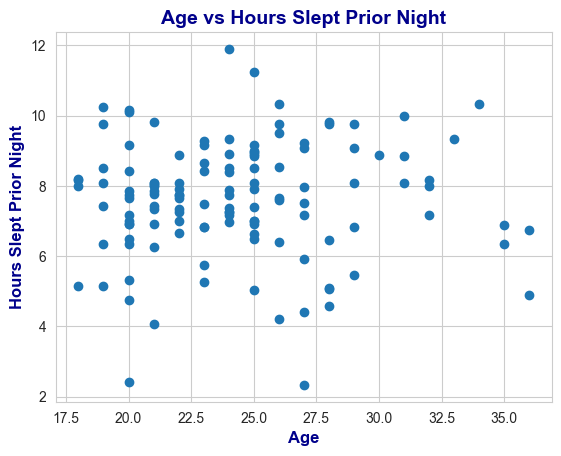

In [33]:
#Exploratory data analysis (EDA)

# Visualize the relationship between Age and Hours_slept_prior_night
plt.scatter(data['Age'], data['Hours_slept_prior_night'])
plt.xlabel('Age', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Hours Slept Prior Night', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.title('Age vs Hours Slept Prior Night', fontsize = 14, fontweight = 'bold', color = 'darkblue')
plt.show()

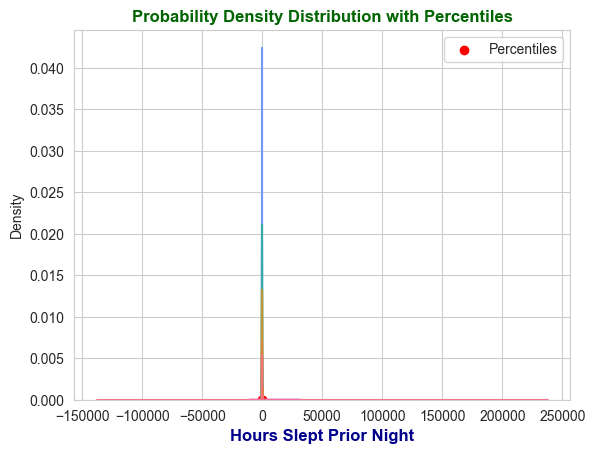

In [23]:
# Estimate the density using kernel density estimator
sns.set_style('whitegrid')
sns.kdeplot(data, bw=1.5)

# Calculate percentiles
percentiles = np.percentile(data, [5, 25, 75, 95])

# Plot percentile dots
plt.scatter(percentiles, [0]*len(percentiles), color='red', marker='o', label='Percentiles')
plt.xlabel('Hours Slept Prior Night', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.title('Probability Density Distribution with Percentiles', fontsize = 12, fontweight = 'bold', color = 'darkgreen')
plt.legend()
plt.show()

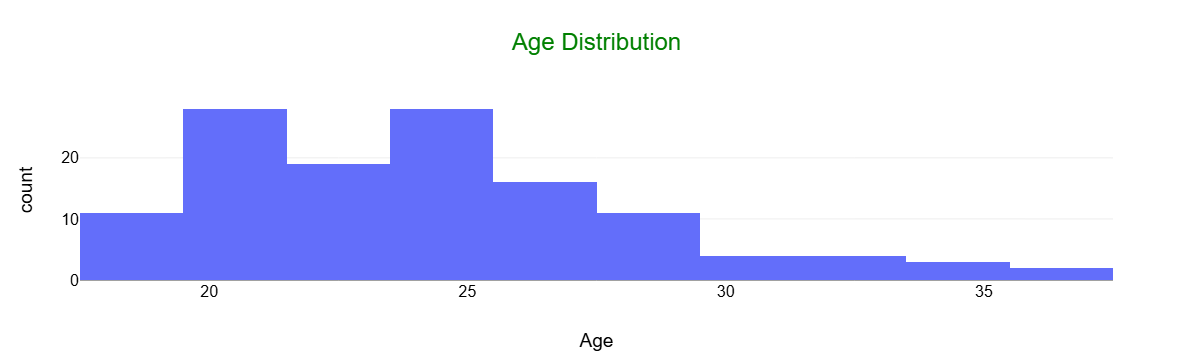

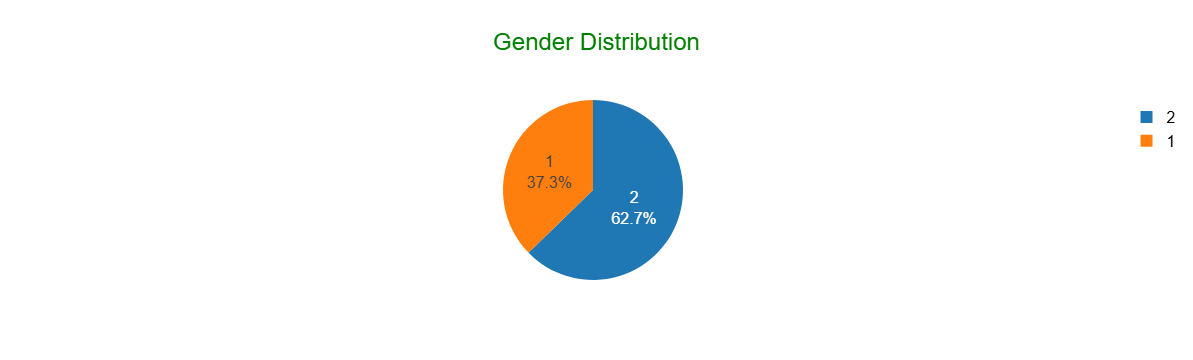

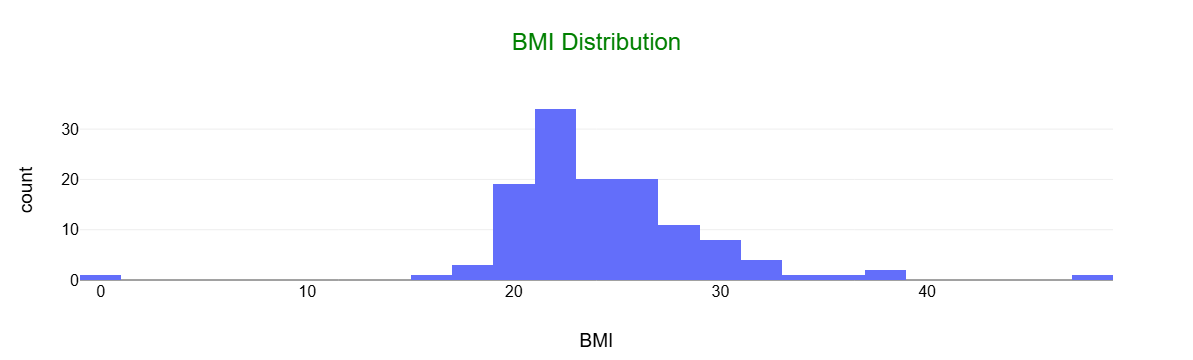

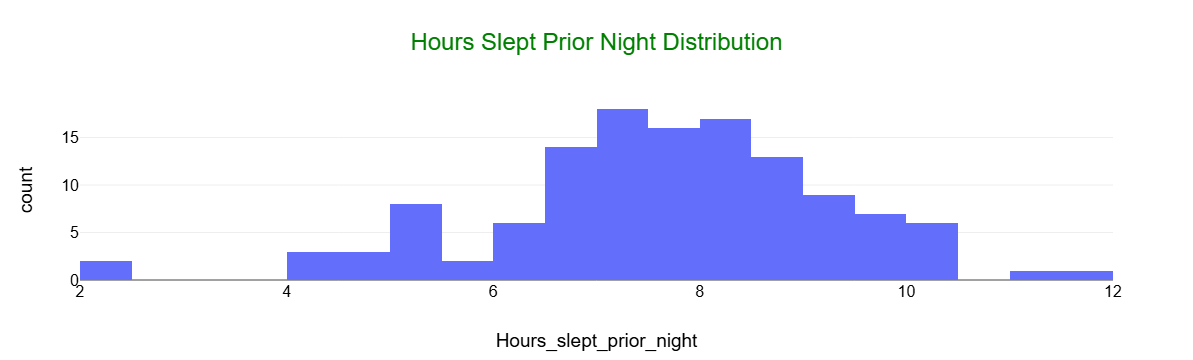

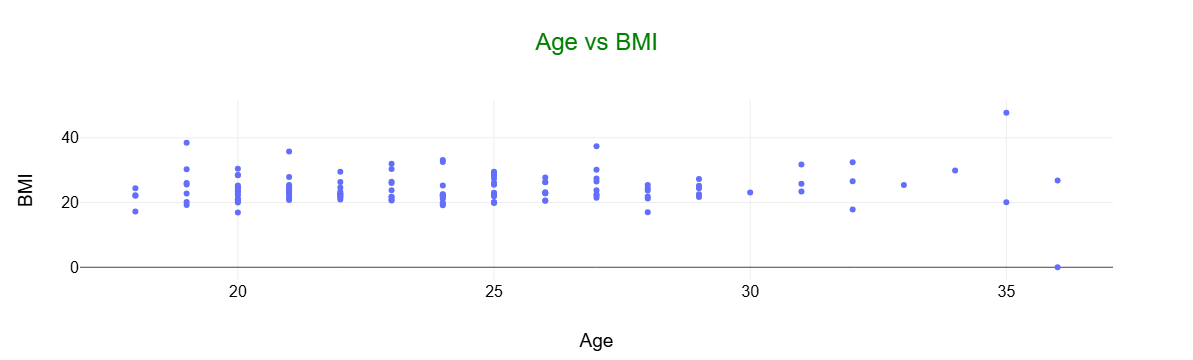

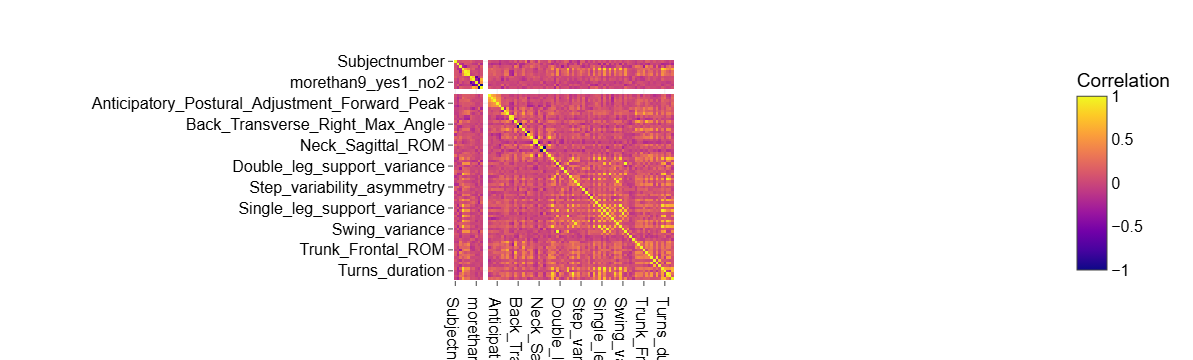

In [26]:
# Set custom style parameters
custom_style = {
    'font': {'family': 'Arial', 'size': 16, 'color': 'black'},
    'title': {'font': {'size': 24, 'color': 'green'}},  # Adjust title font size and color
}

# Distribution of Age
fig1 = px.histogram(data, x='Age', title='Age Distribution')
fig1.update_layout(template='none', **custom_style)  # Apply custom style
fig1.show()

# Gender Distribution
gender_counts = data['Gender1male2female'].value_counts()
fig2 = px.pie(names=gender_counts.index, values=gender_counts.values, title='Gender Distribution')
fig2.update_traces(textinfo='percent+label')  # Show percentages
fig2.update_layout(template='none', **custom_style)  # Apply custom style
fig2.show()

# BMI Distribution
fig3 = px.histogram(data, x='BMI', title='BMI Distribution')
fig3.update_layout(template='none', **custom_style)  # Apply custom style
fig3.show()

# Hours Slept Prior Night Distribution
fig4 = px.histogram(data, x='Hours_slept_prior_night', title='Hours Slept Prior Night Distribution')
fig4.update_layout(template='none', **custom_style)  # Apply custom style
fig4.show()

# Scatter plot between Age and BMI
fig5 = px.scatter(data, x='Age', y='BMI', title='Age vs BMI')
fig5.update_layout(template='none', **custom_style)  # Apply custom style
fig5.show()

# Heatmap for correlation matrix
corr_matrix = data.corr()
fig6 = px.imshow(corr_matrix, labels=dict(color='Correlation'), x=corr_matrix.columns, y=corr_matrix.columns)
fig6.update_layout(template='none', **custom_style)  # Apply custom style
fig6.show()

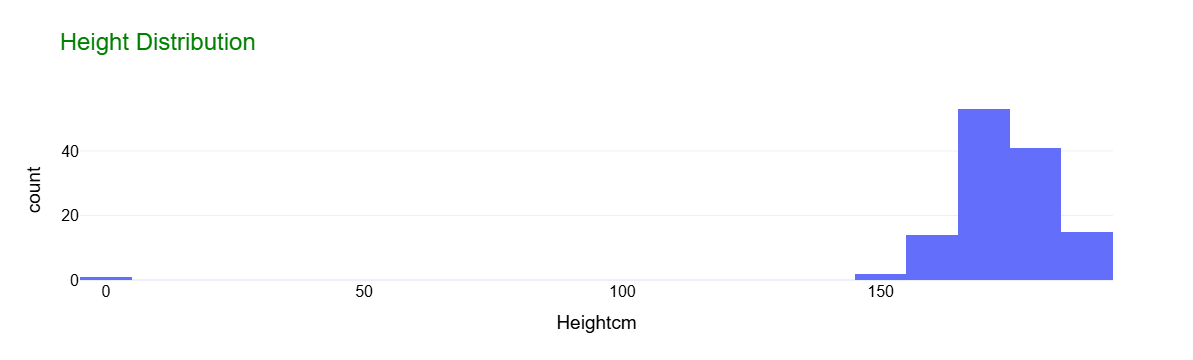

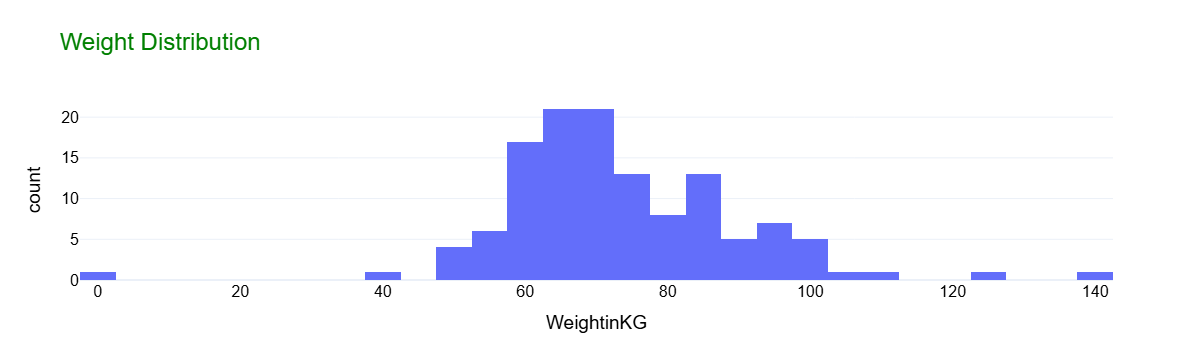

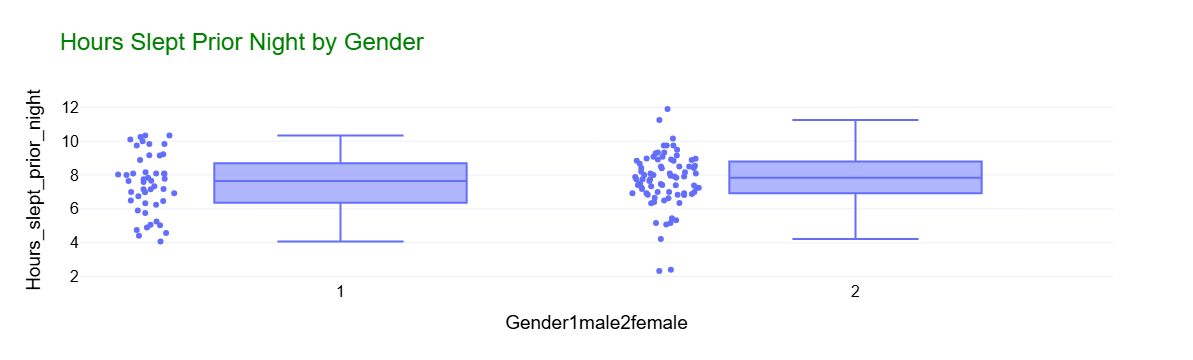

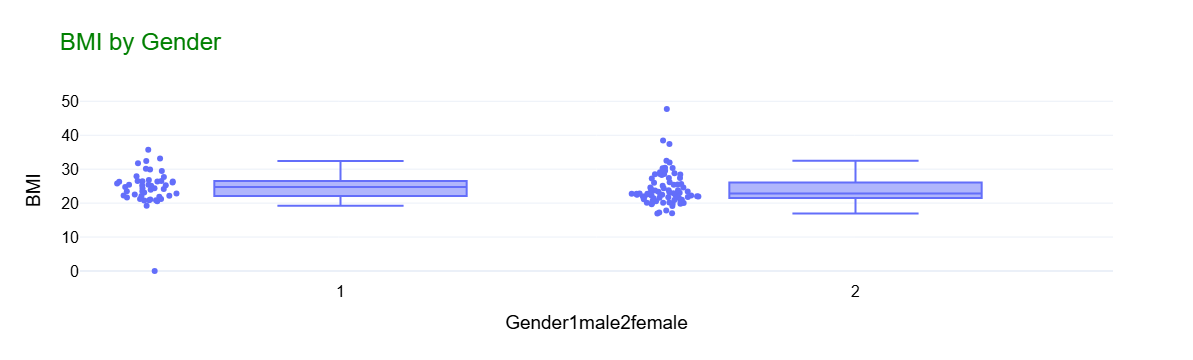

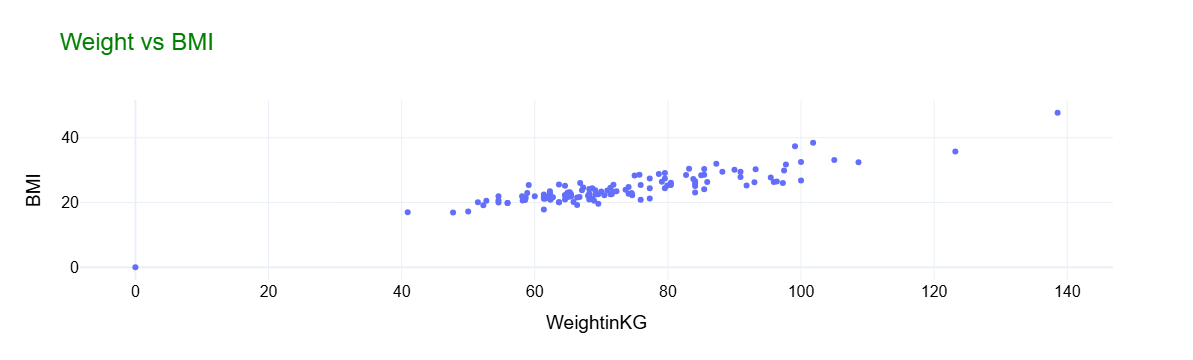

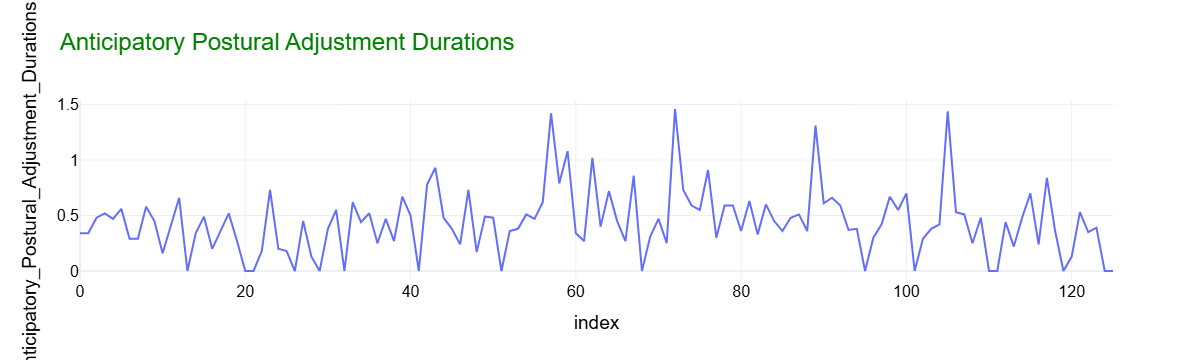

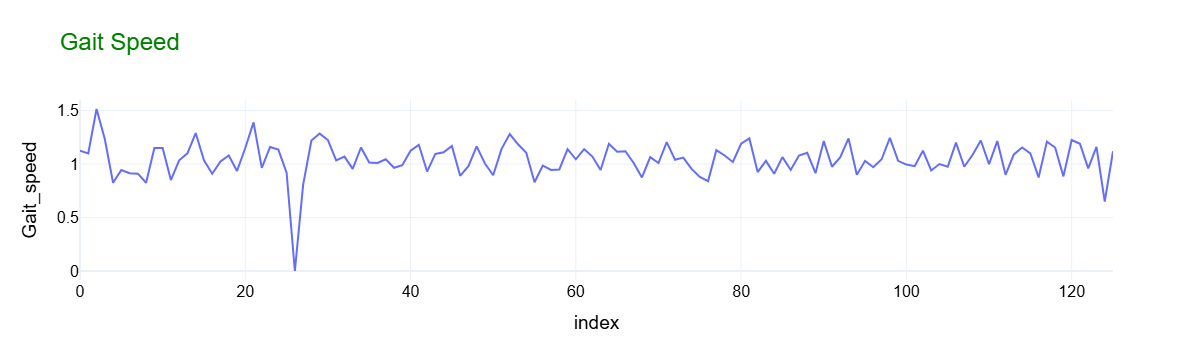

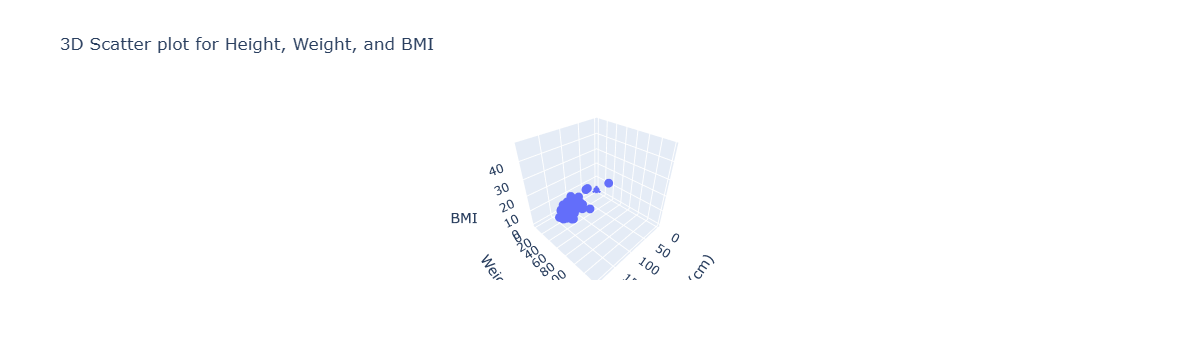

In [27]:
# Custom Style Parameters
custom_style = {
    'font': {'family': 'Arial', 'size': 16, 'color': 'black'},
    'title': {'font': {'size': 24, 'color': 'green'}},  # Adjust title font size and color
}

# Distribution of Height
fig7 = px.histogram(data, x='Heightcm', title='Height Distribution')
fig7.update_layout(template='plotly_white', **custom_style)  # Apply custom style
fig7.show()

# Distribution of Weight
fig8 = px.histogram(data, x='WeightinKG', title='Weight Distribution')
fig8.update_layout(template='plotly_white', **custom_style)  # Apply custom style
fig8.show()

# Boxplot for Hours Slept Prior Night by Gender
fig9 = px.box(data, x='Gender1male2female', y='Hours_slept_prior_night', points="all", title='Hours Slept Prior Night by Gender')
fig9.update_layout(template='plotly_white', **custom_style)  # Apply custom style
fig9.show()

# Boxplot for BMI by Gender
fig10 = px.box(data, x='Gender1male2female', y='BMI', points="all", title='BMI by Gender')
fig10.update_layout(template='plotly_white', **custom_style)  # Apply custom style
fig10.show()

# Scatter plot between Weight and BMI
fig11 = px.scatter(data, x='WeightinKG', y='BMI', title='Weight vs BMI')
fig11.update_layout(template='plotly_white', **custom_style)  # Apply custom style
fig11.show()

# Line plot for Anticipatory_Postural_Adjustment_Durations
fig12 = px.line(data, x=data.index, y='Anticipatory_Postural_Adjustment_Durations', title='Anticipatory Postural Adjustment Durations')
fig12.update_layout(template='plotly_white', **custom_style)  # Apply custom style
fig12.show()

# Line plot for Gait_speed
fig13 = px.line(data, x=data.index, y='Gait_speed', title='Gait Speed')
fig13.update_layout(template='plotly_white', **custom_style)  # Apply custom style
fig13.show()

# 3D Scatter plot for Height, Weight, and BMI
fig14 = go.Figure(data=[go.Scatter3d(x=data['Heightcm'], y=data['WeightinKG'], z=data['BMI'], mode='markers',
                                     marker=dict(size=5))])
fig14.update_layout(scene=dict(xaxis_title='Height (cm)', yaxis_title='Weight (kg)', zaxis_title='BMI'),
                   title='3D Scatter plot for Height, Weight, and BMI')
fig14.show()

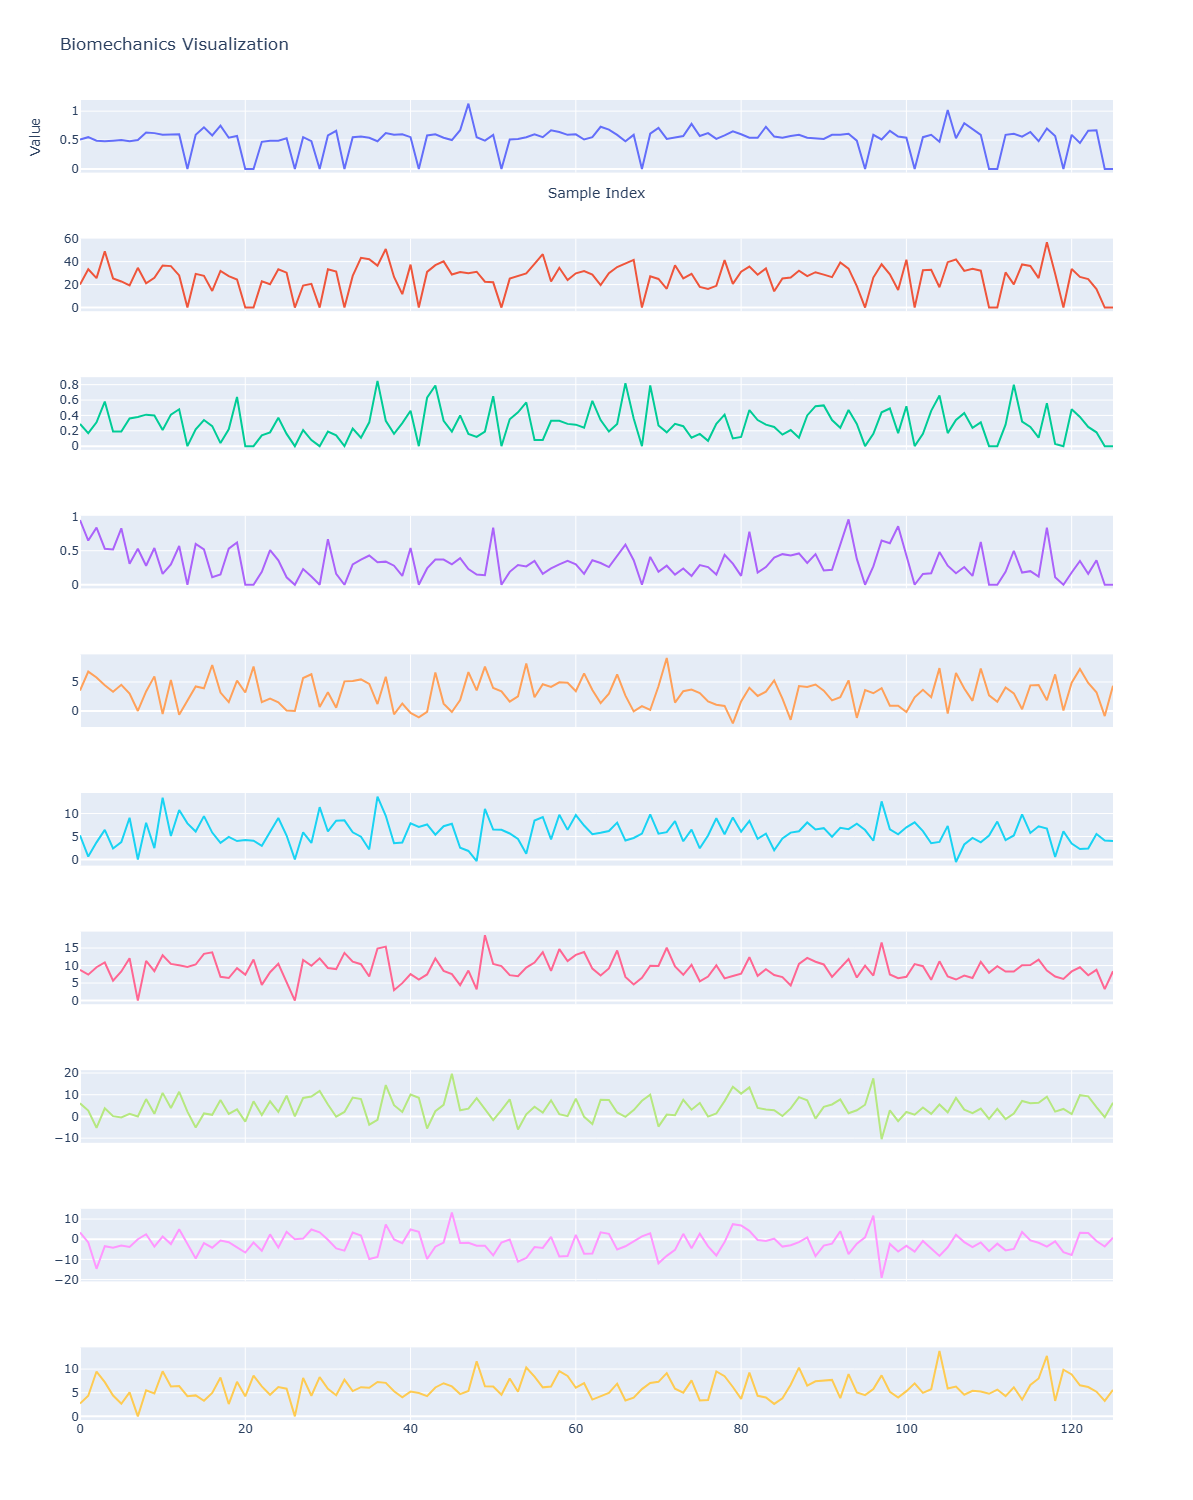

In [32]:
#Biomechanics Visualization

import plotly.graph_objects as go
import plotly.subplots as sp

# Select a subset of variables for visualization
selected_variables = [
    'Anticipatory_Postural_Adjustment_First_Step_Durations',
    'Anticipatory_Postural_Adjustment_First_Step_ROM',
    'Anticipatory_Postural_Adjustment_Forward_Peak',
    'Anticipatory_Postural_Adjustment_Lateral_Peak',
    'Back_Right_Frontal_Bending_Max',
    'Back_Left_Frontal_Bending_Max',
    'Back_Frontal_Bending_ROM',
    'Back_Sagittal_Max_Angle',
    'Back_Sagittal_Min_Angle',
    'Back_Sagittal_ROM'
]

# Create subplots
fig = sp.make_subplots(rows=len(selected_variables), cols=1, shared_xaxes=True, vertical_spacing=0.05)

# Populate subplots with traces
for i, var in enumerate(selected_variables):
    trace = go.Scatter(x=data.index, y=data[var], mode='lines', name=var)
    fig.append_trace(trace, row=i+1, col=1)

# Update layout
fig.update_layout(
    title='Biomechanics Visualization',
    xaxis=dict(title='Sample Index'),
    yaxis=dict(title='Value'),
    height=1500,  # Adjust height based on the number of variables
    showlegend=False
)

# Show plot
fig.show()

In [31]:
#Build Model and Prediction

# Define features (X) and target (y)
X = data[['Age', 'Heightcm', 'WeightinKG', 'BMI']]
y = data['Hours_slept_prior_night']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine (SVR)': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'K-Nearest Neighbors (KNN)': KNeighborsRegressor()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} MSE: {mse:.2f}')

# Make predictions using the best-performing model
best_model = models['Random Forest']  # Adjust based on performance
sample_input = [[25, 170, 70, 24]]  # Example input for prediction
predicted_hours = best_model.predict(sample_input)
print(f'Predicted Hours Slept: {predicted_hours[0]:.2f}')

Linear Regression MSE: 2.46
Random Forest MSE: 2.74
Support Vector Machine (SVR) MSE: 2.19
Gradient Boosting MSE: 4.06
K-Nearest Neighbors (KNN) MSE: 2.05
Predicted Hours Slept: 8.28


In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

# Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV
rf_random_search = RandomizedSearchCV(rf_model, rf_params, n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)
rf_random_search.fit(X_train, y_train)

# Get the best model
best_rf_model = rf_random_search.best_estimator_

# Evaluate the best model using cross-validated MAE
cv_mae = -cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
average_cv_mae = cv_mae.mean()

# Make predictions on test set
y_pred = best_rf_model.predict(X_test)

# Calculate MAE on the test set
mae = mean_absolute_error(y_test, y_pred)

# Print results
print(f'Best Random Forest Model: {best_rf_model}')
print(f'Cross-validated MAE: {average_cv_mae:.2f}')
print(f'Test set MAE: {mae:.2f}')

Best Random Forest Model: RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=200, random_state=42)
Cross-validated MAE: 1.43
Test set MAE: 1.14


In [41]:
#Conclusion
#After performing hyperparameter tuning and evaluation, we find that the Random Forest model with optimized hyperparameters achieved a cross-validated Mean Absolute Error (MAE) of 1.43 on the training data. On the test set, the model achieved a MAE of 1.14, indicating that it performs well in predicting the hours slept prior to the night.

#This indicates that the Random Forest model, with the specified hyperparameters, is a promising choice for predicting hours slept based on the given features. However, further evaluation on additional datasets and potentially more advanced modeling techniques could be explored for even better performance.